In [0]:
!pip install annoy

In [0]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Model
from annoy import AnnoyIndex
from google.colab import files
from IPython.display import Image, display_jpeg

In [0]:
# VGG16の確認
model = VGG16(include_top=True, weights='imagenet',
              input_tensor=None, input_shape=None)

print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 以下のリンクの'images'directoryをimg_dir_pathに挿入
### https://drive.google.com/drive/folders/10Um8dy2ze947-EWIrjmO4FyNLzc00BPZ?usp=sharing

In [0]:
# 以下のリンクの'images'directoryをimg_dir_pathに挿入
# https://drive.google.com/drive/folders/10Um8dy2ze947-EWIrjmO4FyNLzc00BPZ?usp=sharing
img_dir_path = '/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/'
annoy_model_path = '/content/x-fresh-flatten.ann'
# annoy_dim = 4096
annoy_dim = 25088

base_model = VGG16(weights='imagenet')
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output) 
model = Model(inputs=base_model.input,
              outputs=base_model.get_layer('flatten').output)

annoy_model = AnnoyIndex(annoy_dim)

for i in range(1, 3988):
    img_path = img_dir_path + str(i) + '.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    fc2_features = model.predict(x)
    flatten_features = model.predict(x)

    # annoy_model.add_item(i, fc2_features[0])
    annoy_model.add_item(i, flatten_features[0])
    print(img_path, 'saved')

annoy_model.build(3987)
annoy_model.save(annoy_model_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  # This is added back by InteractiveShellApp.init_path()


/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/1.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/2.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/3.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/4.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/5.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/6.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/7.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/8.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/9.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/10.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/11.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/12.jpg saved
/content/drive/My Drive/AntiLocal/Python/x-fresh/dataset/images/13.jpg saved
/content

True

### 検索元の画像をアップロード

In [0]:
search_img = files.upload()

Saving cclab.jpg to cclab.jpg


cclab.jpg


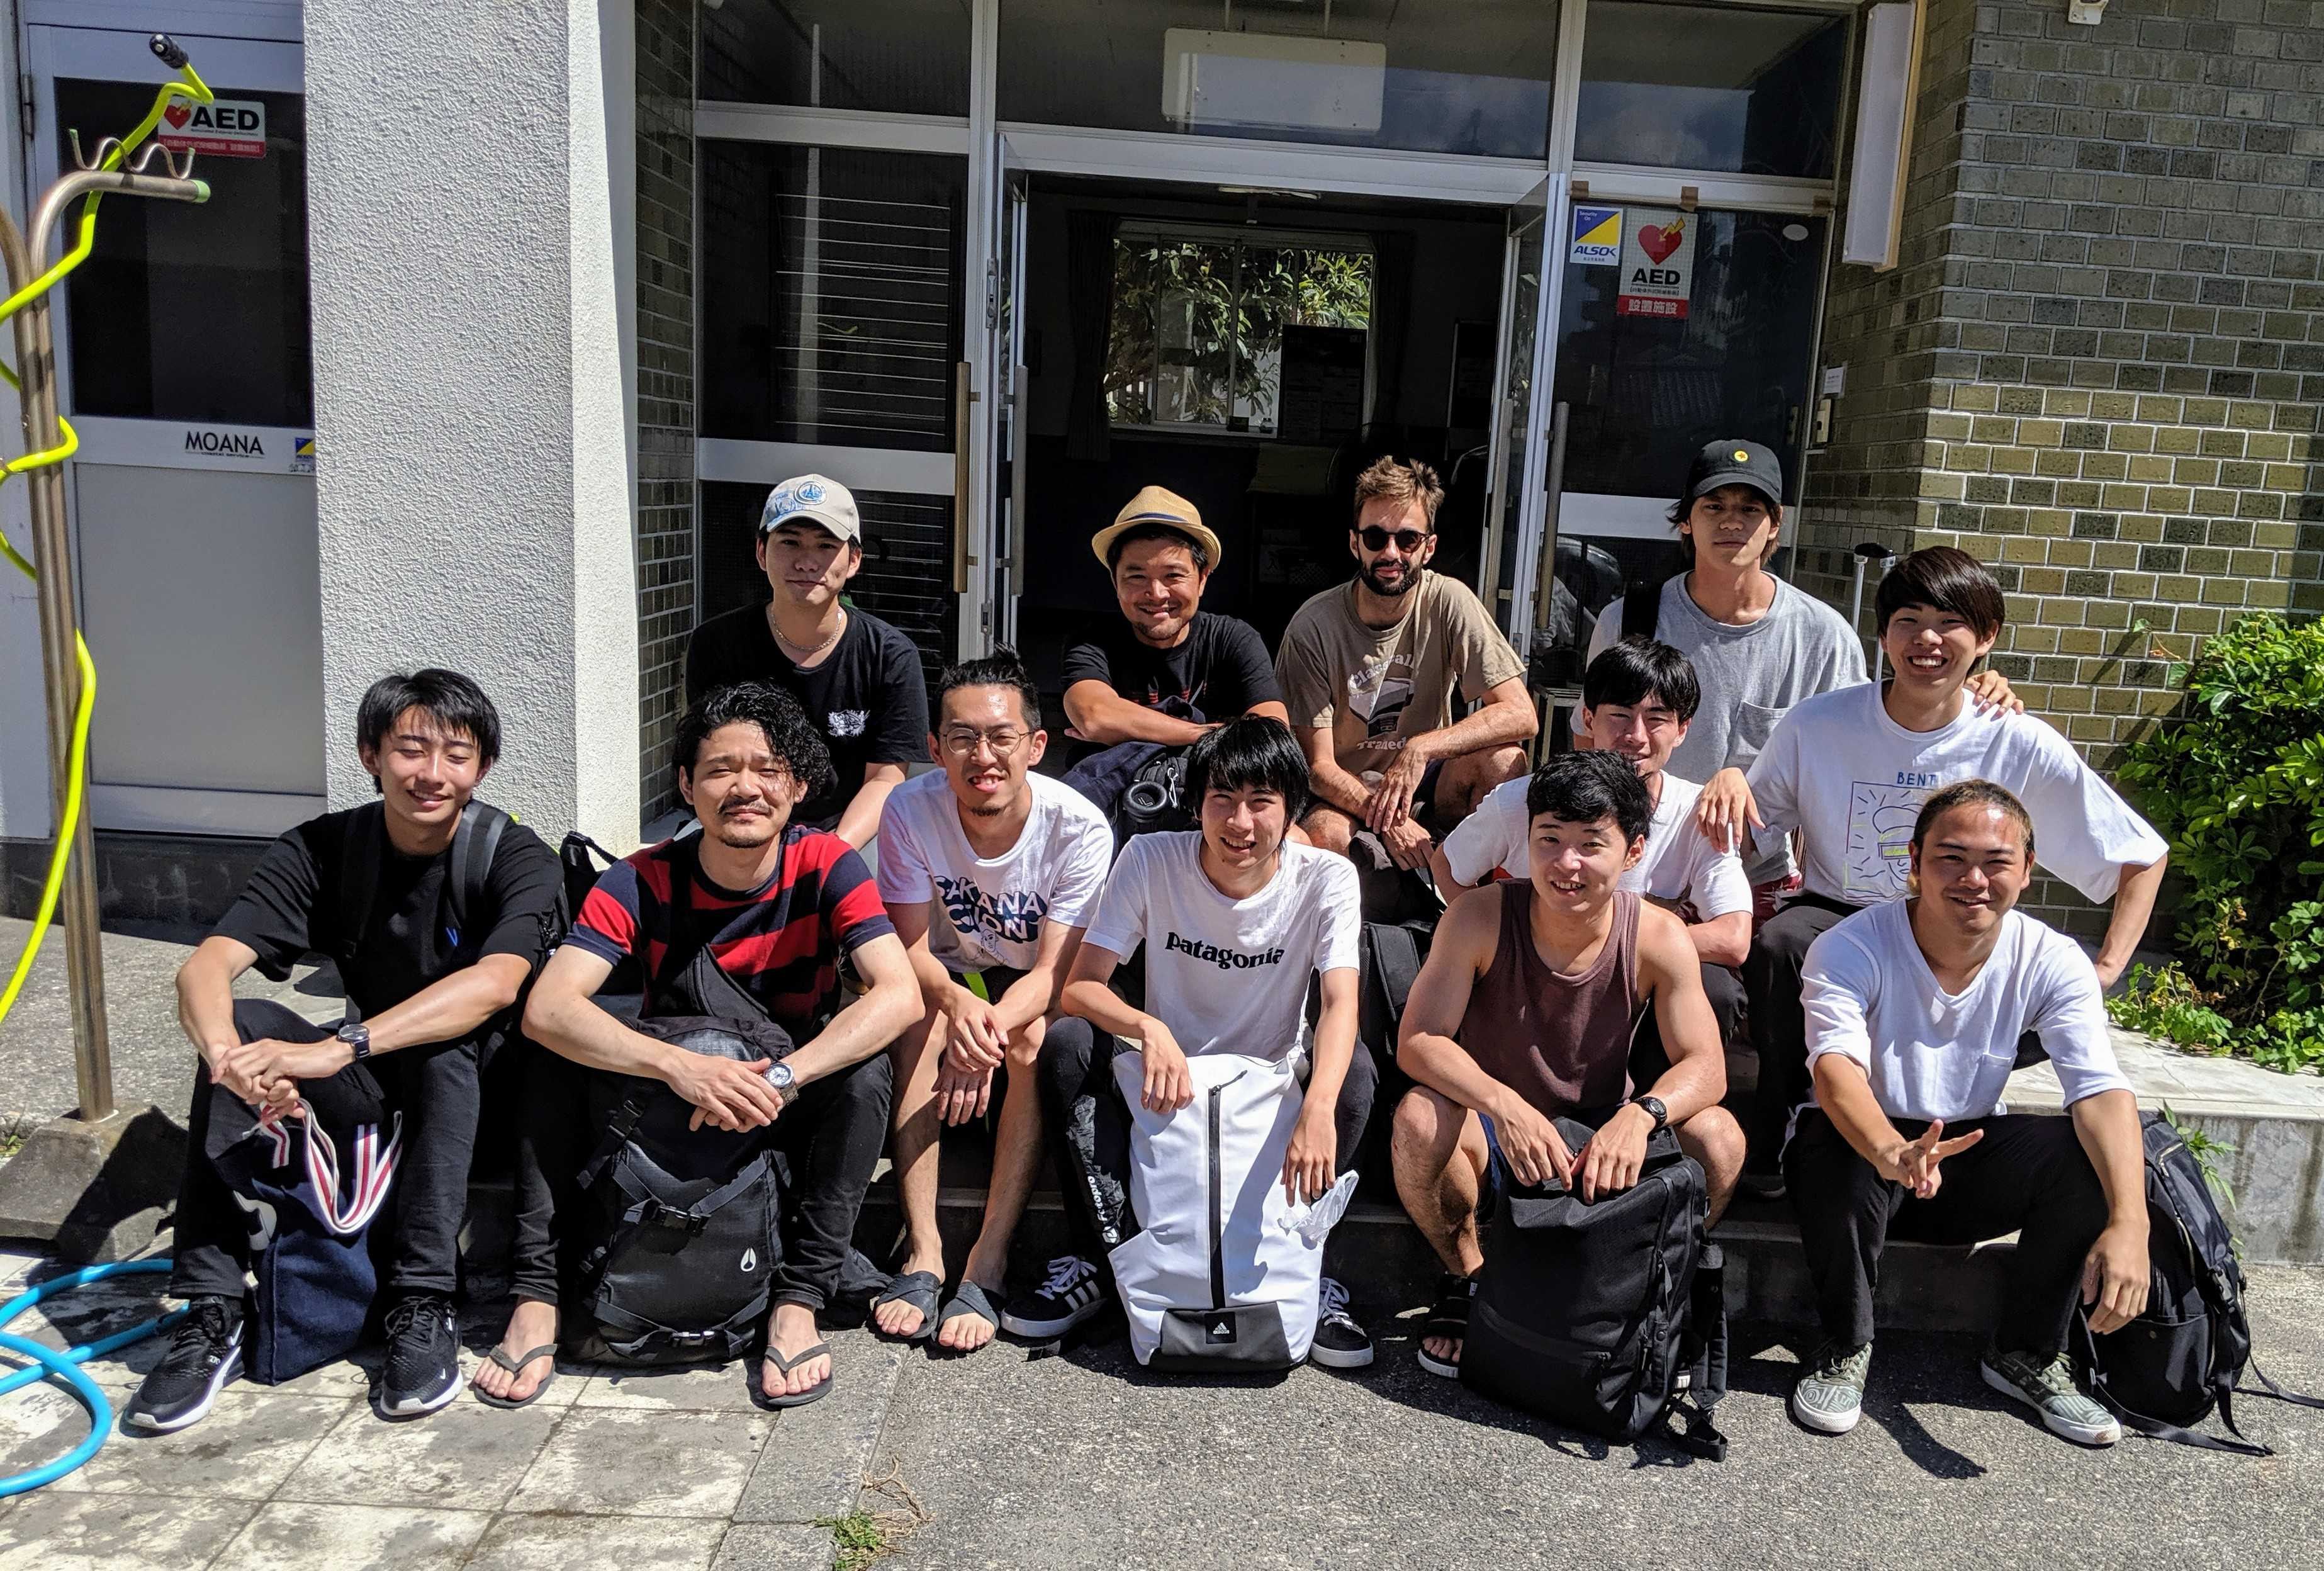

In [0]:
search_img_path = next(iter(search_img))
print(search_img_path)
display_jpeg(Image(search_img_path))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  # This is added back by InteractiveShellApp.init_path()


2093.jpg


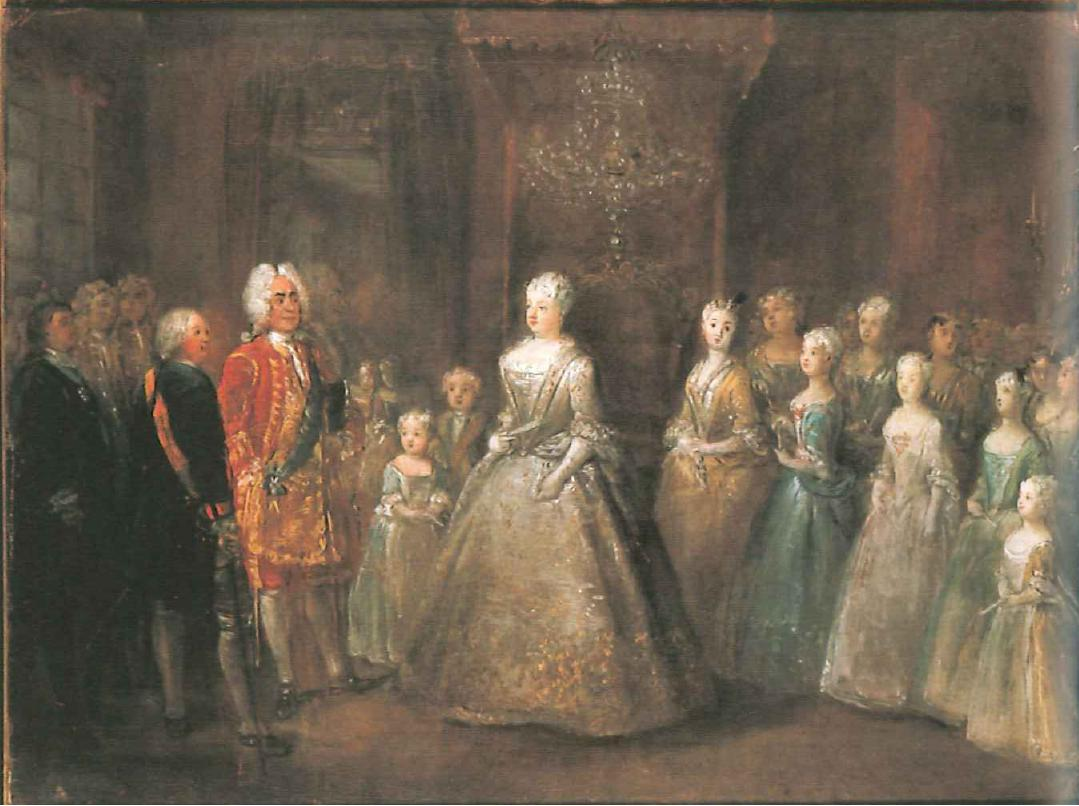

2479.jpg


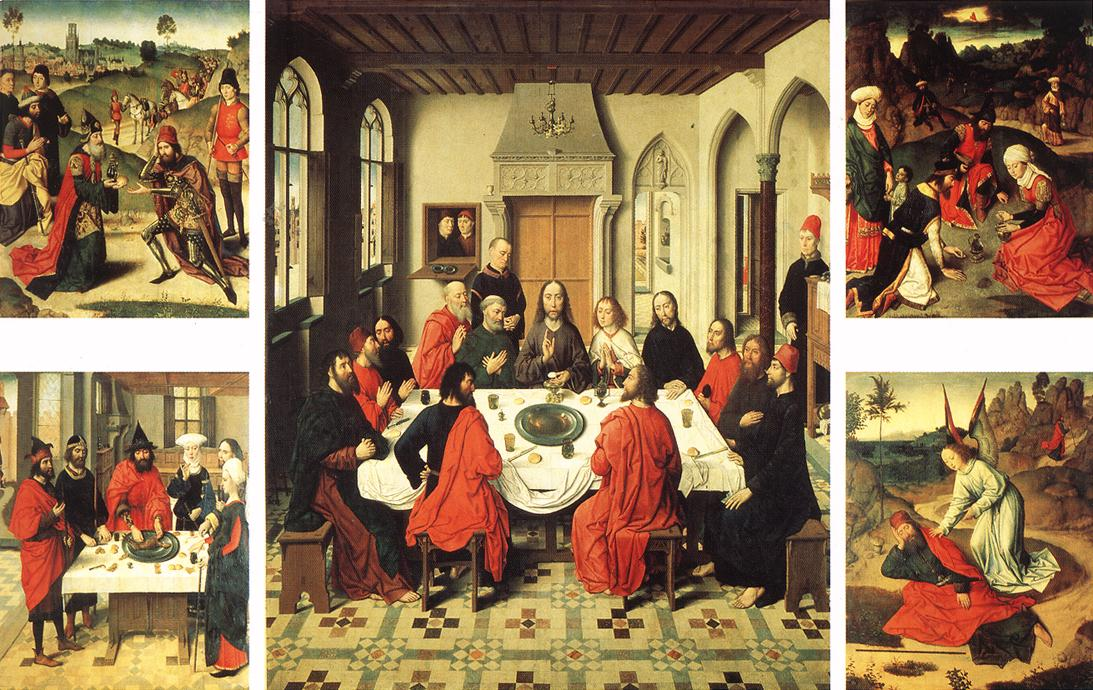

2497.jpg


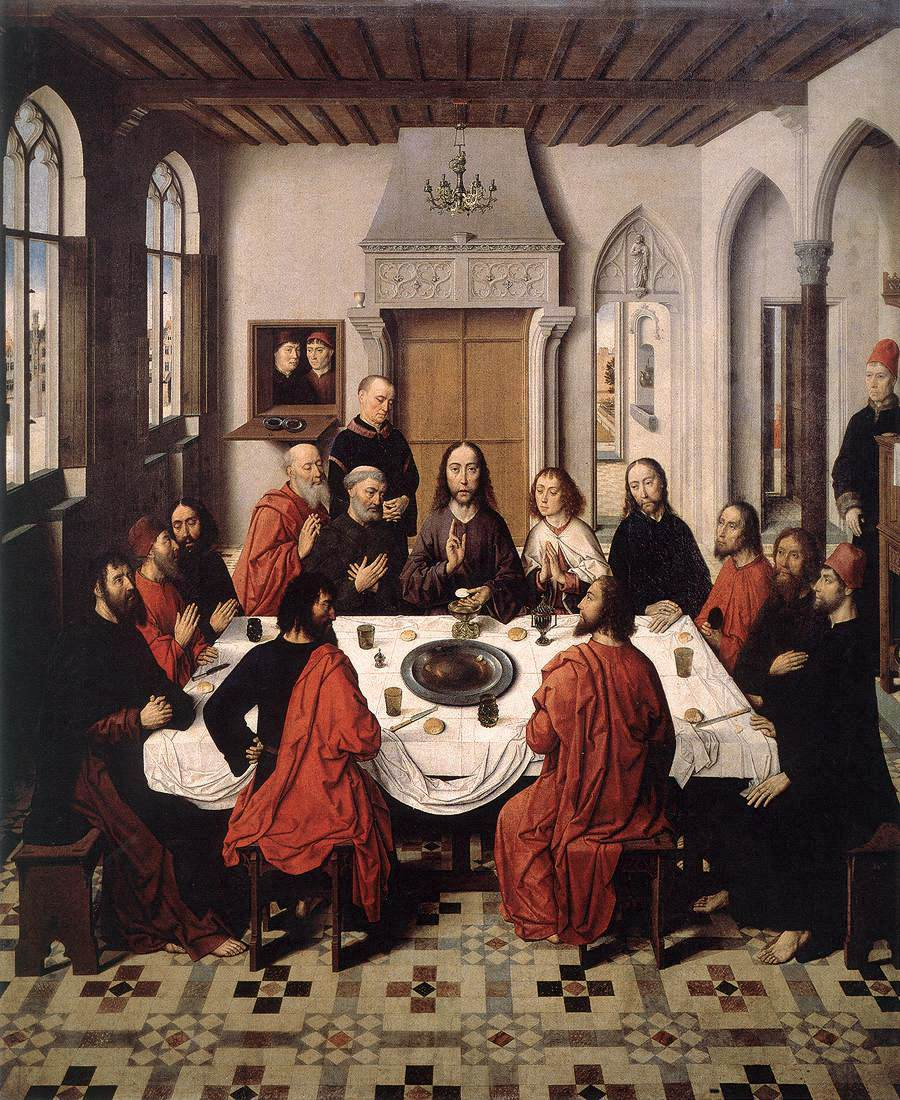

In [0]:
annoy_model_path = '/content/x-fresh-flatten.ann'
# annoy_dim = 4096
annoy_dim = 25088

base_model = VGG16(weights='imagenet')

# model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
model = Model(inputs=base_model.input,
              outputs=base_model.get_layer('flatten').output)

loaded_model = AnnoyIndex(annoy_dim)
loaded_model.load(annoy_model_path)

img_path = search_img_path
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# fc2_features = model.predict(x)
flatten_features = model.predict(x)

# items = loaded_model.get_nns_by_vector(fc2_features[0], 3, search_k=-1, include_distances=False)
items = loaded_model.get_nns_by_vector(
    flatten_features[0], 3, search_k=-1, include_distances=False)

print(str(items[0]) + '.jpg')
display_jpeg(Image(img_dir_path + str(items[0]) + '.jpg'))

print(str(items[1]) + '.jpg')
display_jpeg(Image(img_dir_path + str(items[1]) + '.jpg'))

print(str(items[2]) + '.jpg')
display_jpeg(Image(img_dir_path + str(items[2]) + '.jpg'))